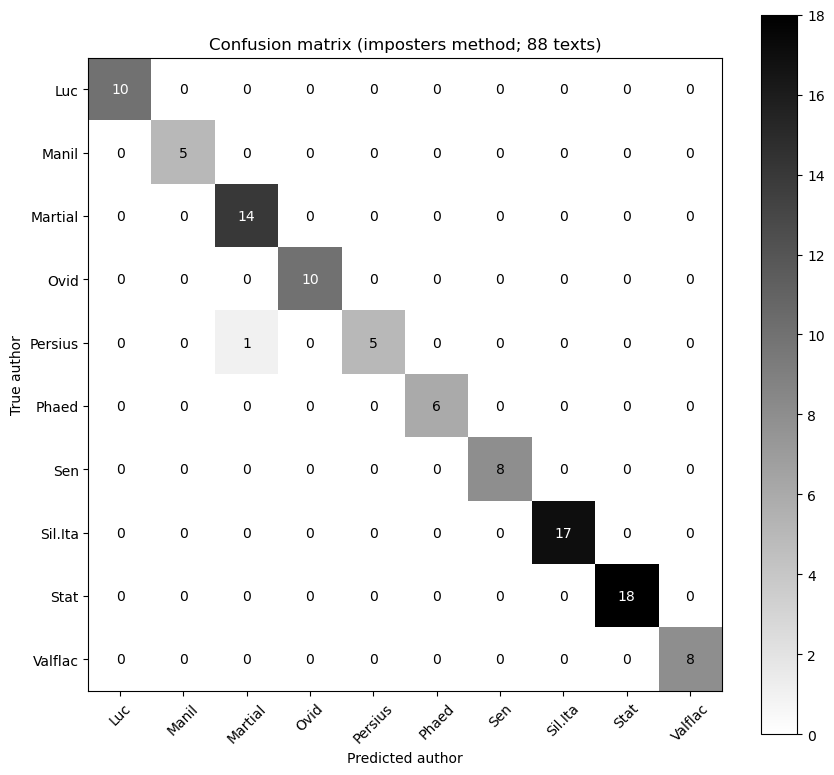

              precision    recall  f1-score   support

         Luc       1.00      1.00      1.00        10
       Manil       1.00      1.00      1.00         5
     Martial       0.93      1.00      0.97        14
        Ovid       1.00      1.00      1.00        10
     Persius       1.00      0.83      0.91         6
       Phaed       1.00      1.00      1.00         6
         Sen       1.00      1.00      1.00         8
     Sil.Ita       1.00      1.00      1.00        17
        Stat       1.00      1.00      1.00        18
     Valflac       1.00      1.00      1.00         8

    accuracy                           0.99       102
   macro avg       0.99      0.98      0.99       102
weighted avg       0.99      0.99      0.99       102



In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns


# set seaborn color palette to colorblind for accessibility
sns.set_palette('colorblind')

# read excel file
# read the validation results for the GI method using the cosine distance
results_path = Path("..") / "results" / "results_imposters_valid_cosine.xlsx"
val_gi_res_cosd = pd.read_excel(results_path)

# extract true and predicted authors from the dataframe; capitalise the first letter `title()`
true_authors = val_gi_res_cosd['real_author'].str.title()
predicted_authors = val_gi_res_cosd['attributed_author'].str.title()

# get unique class names for the confusion matrix and sort them alphabetically
class_names = sorted(true_authors.unique())


# confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(
    true_authors,
    predicted_authors,
    cmap='binary',  # color map for the confusion matrix
    xticks_rotation=45,  # rotate x-axis labels for better visibility
    normalize=None  # do not normalize the confusion matrix (show counts)
)

# adjust title and labels for the confusion matrix plot
disp.ax_.set_title('Confusion matrix (imposters method; 88 texts)')
disp.ax_.set(xlabel='Predicted author', ylabel='True author')
# adjust figure size
fig = disp.figure_
fig.set_figwidth(9)
fig.set_figheight(8)
plt.tight_layout()
plt.savefig('../results/heatm_eval_gi.png', dpi=500)  # run before `plt.show()` otherwise it is not working
plt.savefig('../results/heatm_eval_gi.pdf', dpi=500)  # journal version plot
plt.show()

# display classification report for precision, recall, and F1-score
print(metrics.classification_report(true_authors,
                                    predicted_authors,
                                    zero_division=0,  # handle divisions by zero gracefully
                                    digits=2))  # show metrics with 2 decimal places